In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
data = yf.download("SPY AAPL", start="2020-01-01", end="2021-09-30")

[*********************100%***********************]  2 of 2 completed


In [3]:
df = data.Close.copy()

In [5]:
data

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2019-12-31   72.139954  310.837585   73.412498  321.859985   73.419998   
2020-01-02   73.785912  313.744537   75.087502  324.869995   75.150002   
2020-01-03   73.068573  311.368744   74.357498  322.410004   75.144997   
2020-01-06   73.650795  312.556610   74.949997  323.640015   74.989998   
2020-01-07   73.304413  311.677826   74.597504  322.730011   75.224998   
...                ...         ...         ...         ...         ...   
2021-09-23  146.214645  440.260712  146.830002  443.179993  147.080002   
2021-09-24  146.304260  440.985931  146.919998  443.910004  147.470001   
2021-09-27  144.760742  439.724304  145.369995  442.640015  145.960007   
2021-09-28  141.315262  430.863037  141.910004  433.720001  144.750000   
2021-09-29  142.231400  431.588226  142.830002  434.450012  144.449997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2019-12-31  322.130005   72.379997  320.149994   72.482498  320.529999   
2020-01-02  324.890015   73.797501  322.529999   74.059998  323.540009   
2020-01-03  323.640015   74.125000  321.100006   74.287498  321.160004   
2020-01-06  323.730011   73.187500  320.359985   73.447502  320.489990   
2020-01-07  323.540009   74.370003  322.239990   74.959999  323.019989   
...                ...         ...         ...         ...         ...   
2021-09-23  444.890015  145.639999  439.600006  146.649994  439.850006   
2021-09-24  444.670013  145.559998  441.209991  145.660004  441.440002   
2021-09-27  444.049988  143.820007  441.899994  145.470001  442.809998   
2021-09-28  440.040009  141.690002  432.940002  143.250000  439.690002   
2021-09-29  437.040009  142.029999  433.850006  142.470001  435.190002   

               Volume             
                 AAPL        SPY  
Date                              
2019-12-31  100805600   57077300  
2020-01-02  135480400   59151200  
2020-01-03  146322800   77709700  
2020-01-06  118387200   55653900  
2020-01-07  108872000   40496400  
...               ...        ...  
2021-09-23   64838200   76396000  
2021-09-24   53477900   62094800  
2021-09-27   74150700   61371100  
2021-09-28  108972300  130436300  
2021-09-29   74602000   82329200  

[441 rows x 12 columns]

In [6]:
df

,AAPL,SPY
Date,,
2019-12-31,73.412498,321.859985
2020-01-02,75.087502,324.869995
2020-01-03,74.357498,322.410004
2020-01-06,74.949997,323.640015
2020-01-07,74.597504,322.730011
...,...,...
2021-09-23,146.830002,443.179993
2021-09-24,146.919998,443.910004
2021-09-27,145.369995,442.640015


<AxesSubplot:xlabel='Date'>

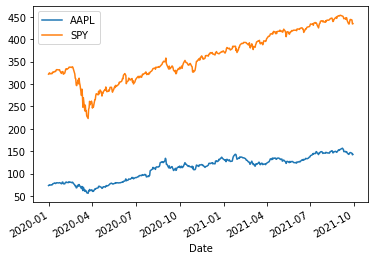

In [8]:
df.plot()

<AxesSubplot:xlabel='Date'>

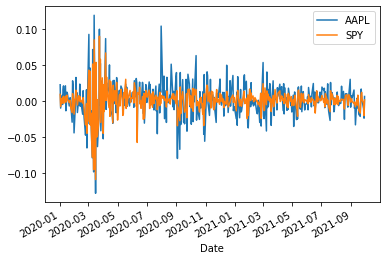

In [7]:
df.pct_change(1).plot()

In [11]:
df_ret = df.pct_change(1)

In [12]:
df_ret

,AAPL,SPY
Date,,
2019-12-31,NaN,NaN
2020-01-02,0.022816,0.009352
2020-01-03,-0.009722,-0.007572
2020-01-06,0.007968,0.003815
2020-01-07,-0.004703,-0.002812
...,...,...
2021-09-23,0.006719,0.012150
2021-09-24,0.000613,0.001647
2021-09-27,-0.010550,-0.002861


<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

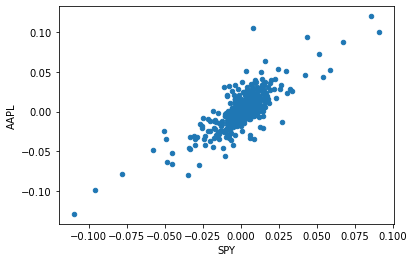

In [14]:
df_ret.plot.scatter(x="SPY", y="AAPL")

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

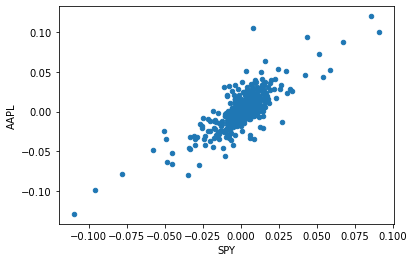

In [15]:
df.pct_change(1).plot.scatter(x="SPY", y="AAPL")

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

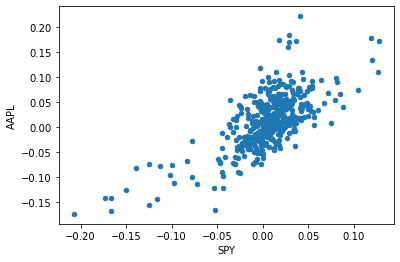

In [16]:
df.pct_change(7).plot.scatter(x="SPY", y="AAPL")

### <B> OLS (Ordinary Least Squares) Based <B>
^β = (XTX)−1XTy

In [17]:
x = df_ret.SPY
y = df_ret.AAPL

In [18]:
x = x.dropna()
y = y.dropna()

In [20]:
x

Date
2020-01-02    0.009352
2020-01-03   -0.007572
2020-01-06    0.003815
2020-01-07   -0.002812
2020-01-08    0.005330
                ...   
2021-09-23    0.012150
2021-09-24    0.001647
2021-09-27   -0.002861
2021-09-28   -0.020152
2021-09-29    0.001683
Name: SPY, Length: 440, dtype: float64

In [21]:
type(x)

pandas.core.series.Series

In [22]:
m,c = np.polyfit(x,y,1)

In [23]:
m # slope

1.1789066817783902

In [25]:
c # intercept

0.0008443130008306685

In [26]:
import matplotlib.pyplot as plt

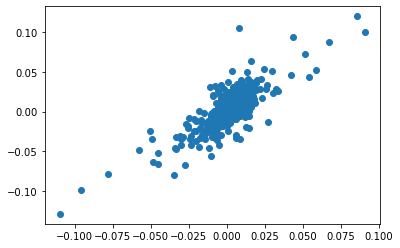

In [27]:
plt.plot(x, y, 'o')

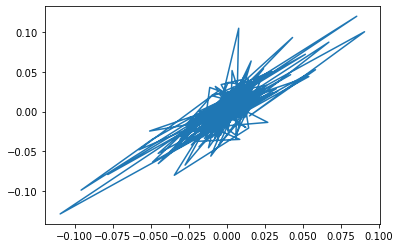

In [28]:
plt.plot(x, y)

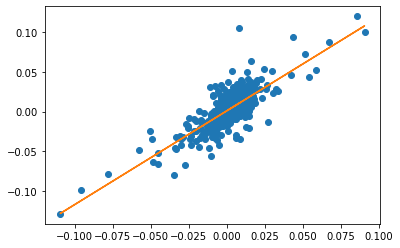

In [31]:
plt.plot(x, y, "o")
plt.plot(x, m*x+c)

In [33]:
x

Date
2020-01-02    0.009352
2020-01-03   -0.007572
2020-01-06    0.003815
2020-01-07   -0.002812
2020-01-08    0.005330
                ...   
2021-09-23    0.012150
2021-09-24    0.001647
2021-09-27   -0.002861
2021-09-28   -0.020152
2021-09-29    0.001683
Name: SPY, Length: 440, dtype: float64

In [34]:
x.values

array([ 9.35192289e-03, -7.57223348e-03,  3.81505218e-03, -2.81177735e-03,
        5.32953603e-03,  6.78064912e-03, -2.87770537e-03,  6.87734737e-03,
       -1.52462260e-03,  2.25985710e-03,  8.31838559e-03,  3.11253094e-03,
       -1.95819970e-03,  1.20762289e-04,  1.14687296e-03, -8.89307909e-03,
       -1.60294102e-02,  1.04791797e-02, -8.26025633e-04,  3.24535416e-03,
       -1.81579035e-02,  7.42853961e-03,  1.52412764e-02,  1.15480089e-02,
        3.36485515e-03, -5.32965663e-03,  7.46532323e-03,  1.73304979e-03,
        6.44277158e-03, -1.06696655e-03,  1.60211401e-03, -2.57699971e-03,
        4.78123511e-03, -4.10824657e-03, -1.02982671e-02, -3.31653988e-02,
       -3.03021498e-02, -3.67821500e-03, -4.49116861e-02, -4.20153931e-03,
        4.33065083e-02, -2.86324572e-02,  4.20330253e-02, -3.32416876e-02,
       -1.65311120e-02, -7.80944703e-02,  5.17448925e-02, -4.87484482e-02,
       -9.56771619e-02,  8.54863031e-02, -1.09423735e-01,  5.39920643e-02,
       -5.06329229e-02,  

In [35]:
type(x.values)

numpy.ndarray

In [36]:
x.to_numpy()

array([ 9.35192289e-03, -7.57223348e-03,  3.81505218e-03, -2.81177735e-03,
        5.32953603e-03,  6.78064912e-03, -2.87770537e-03,  6.87734737e-03,
       -1.52462260e-03,  2.25985710e-03,  8.31838559e-03,  3.11253094e-03,
       -1.95819970e-03,  1.20762289e-04,  1.14687296e-03, -8.89307909e-03,
       -1.60294102e-02,  1.04791797e-02, -8.26025633e-04,  3.24535416e-03,
       -1.81579035e-02,  7.42853961e-03,  1.52412764e-02,  1.15480089e-02,
        3.36485515e-03, -5.32965663e-03,  7.46532323e-03,  1.73304979e-03,
        6.44277158e-03, -1.06696655e-03,  1.60211401e-03, -2.57699971e-03,
        4.78123511e-03, -4.10824657e-03, -1.02982671e-02, -3.31653988e-02,
       -3.03021498e-02, -3.67821500e-03, -4.49116861e-02, -4.20153931e-03,
        4.33065083e-02, -2.86324572e-02,  4.20330253e-02, -3.32416876e-02,
       -1.65311120e-02, -7.80944703e-02,  5.17448925e-02, -4.87484482e-02,
       -9.56771619e-02,  8.54863031e-02, -1.09423735e-01,  5.39920643e-02,
       -5.06329229e-02,  